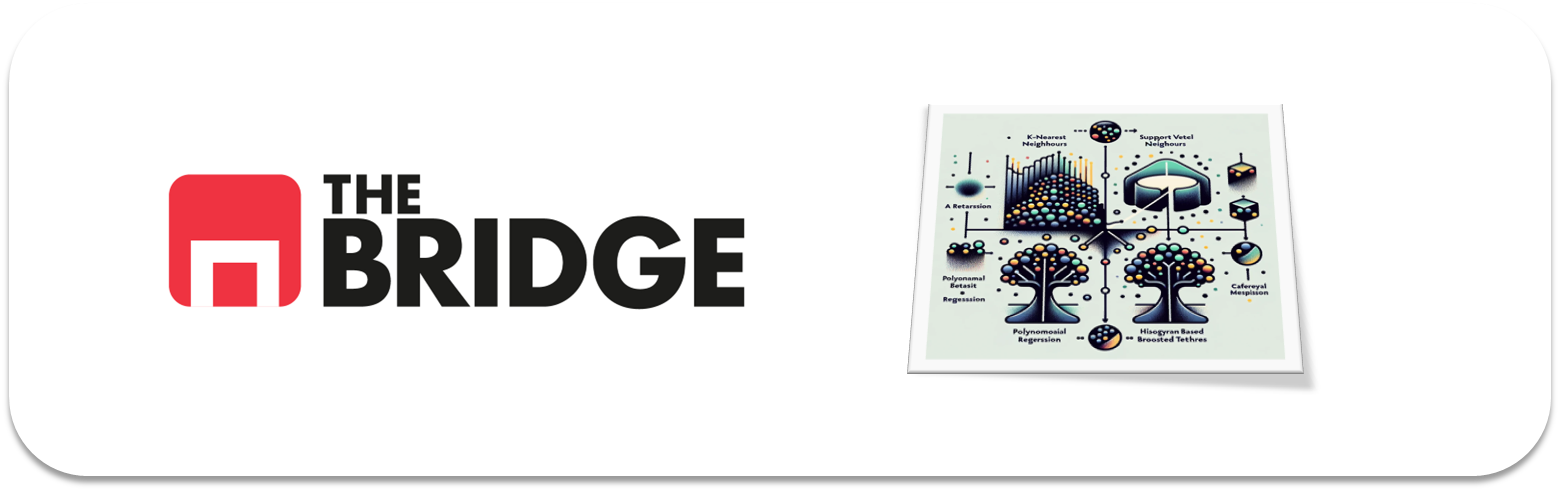

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import toolbox_ML as ml
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv("./data/credit_npo.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

NOTA: hay nulos en 'MonthlyIncome' y en 'NumberOfDependents'

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [5]:
ml.tipifica_variables(df, 10, 0.1)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numerica Continua
2,age,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numerica Discreta
4,DebtRatio,Numerica Continua
5,MonthlyIncome,Numerica Continua
6,NumberOfOpenCreditLinesAndLoans,Numerica Discreta
7,NumberOfTimes90DaysLate,Numerica Discreta
8,NumberRealEstateLoansOrLines,Numerica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


In [6]:
target = target = 'SeriousDlqin2yrs'

In [7]:
features_cat = ['NumberOfTime60-89DaysPastDueNotWorse']

In [8]:
features_num = [col for col in df.columns if col not in features_cat + [target]]

In [9]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [10]:
target = 'SeriousDlqin2yrs'

Problema de clasificación, si va a tener dificultades financieras en los dos próximos años o no.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

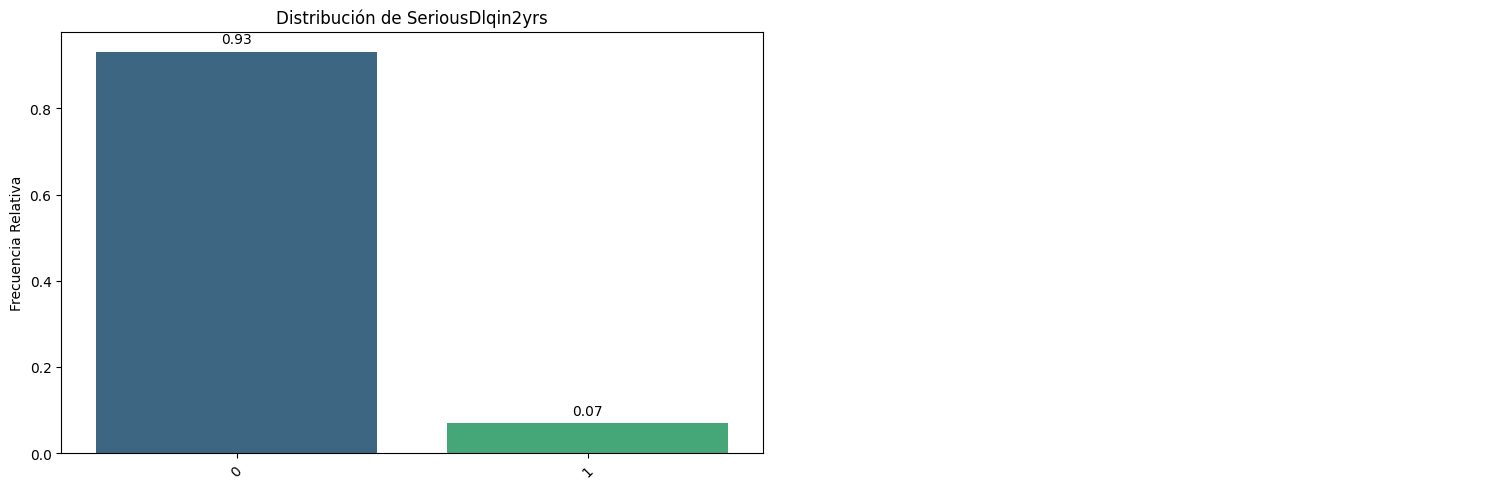

In [11]:
bt.pinta_distribucion_categoricas(df, [target], relativa = True, mostrar_valores = True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

####  Antes de comenzar con el escalado debemos tratar las variables con nulos.

In [12]:
df.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.057510
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.014118
dtype: float64

Como no estoy segura si debo usar la media o la media miramos su distribución. Si su distribución está normalizada usaré la media.

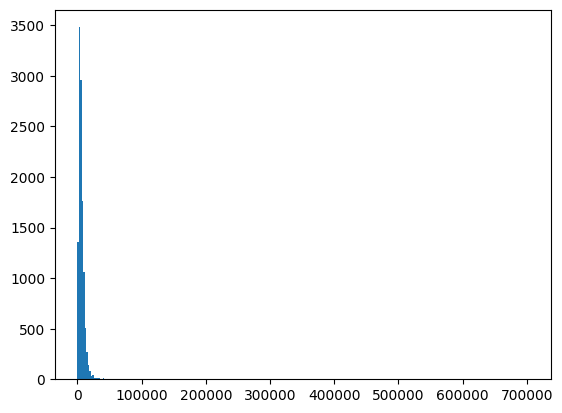

In [13]:
plt.hist(df['MonthlyIncome'], bins=300);

<Axes: >

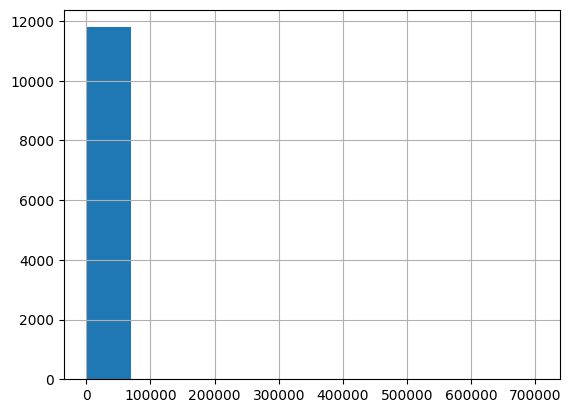

In [14]:
df['MonthlyIncome'].hist()

In [15]:
df['MonthlyIncome'].skew()

34.82197041215729

<Axes: >

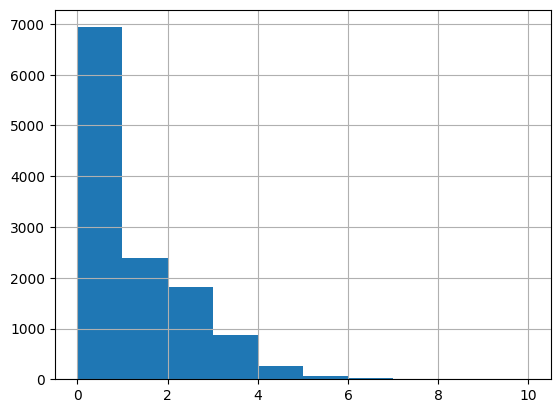

In [16]:
df['NumberOfDependents'].hist()

In [17]:
df['NumberOfDependents'].skew() # calcula la asimetria 

1.4300773472176052

Como son asimétrica y en el cálculo de la asimetría en ambos casos el resultado es mayor a 0.5 usaré la mediana.

In [18]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

C:\Users\maria\AppData\Local\Temp\ipykernel_10088\3341837283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_10088\3341837283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [19]:
df.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

#### 1. Escalamos las variables numéricas.

In [20]:
print(df[features_num].dtypes)

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfDependents                      float64
dtype: object


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_num_scaled= scaler.fit_transform(df[features_num])

In [22]:
df_scaled = pd.DataFrame(features_num_scaled, columns=features_num)
df_scaled.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04,1.253700e+04
mean,1.133513e-16,2.006318e-16,1.445229e-17,3.145499e-17,-1.813621e-17,6.914430e-17,1.643594e-17,-1.133513e-17,-5.780917e-17
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-8.973900e-01,-2.061395e+00,-1.009925e-01,-2.085380e-01,-5.889578e-01,-1.642203e+00,-6.425787e-02,-8.809133e-01,-7.154275e-01
25%,-8.141302e-01,-7.348624e-01,-1.009925e-01,-1.929417e-01,-2.806482e-01,-6.741891e-01,-6.425787e-02,-8.809133e-01,-7.154275e-01
50%,-4.532836e-01,-7.159596e-02,-1.009925e-01,-1.754280e-01,-1.185902e-01,-9.338086e-02,-6.425787e-02,7.032117e-04,-7.154275e-01
75%,6.841529e-01,6.579971e-01,-1.009925e-01,-1.529874e-01,1.086905e-01,4.874274e-01,-6.425787e-02,8.823198e-01,1.672922e-01
max,1.540104e+01,3.244736e+00,2.406298e+01,1.064452e+01,6.042162e+01,7.844332e+00,2.422024e+01,1.586980e+01,8.111769e+00


In [23]:
df_scaled[features_cat] = df[features_cat]
df_scaled[target] = df[target]

In [24]:
df_scaled

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,NumberOfTime60-89DaysPastDueNotWorse,SeriousDlqin2yrs
0,-0.674939,-1.000169,-0.100992,-0.200786,-0.097747,0.681030,0.183543,-0.880913,-0.715427,0,0
1,-0.833791,1.453917,-0.100992,-0.185604,-0.166009,0.100222,-0.064258,0.000703,-0.715427,0,0
2,-0.897390,-0.602209,-0.100992,-0.199682,-0.154719,-1.254997,-0.064258,-0.880913,1.050012,0,0
3,0.441130,-0.535882,-0.100992,-0.163291,0.047897,-0.867792,-0.064258,0.882320,1.932731,0,0
4,1.819015,0.724324,-0.100992,-0.208538,0.134745,-1.061395,-0.064258,-0.880913,0.167292,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12532,-0.361943,0.459017,-0.100992,-0.176723,-0.142560,-0.480586,-0.064258,0.000703,-0.715427,0,0
12533,-0.797628,0.657997,-0.100992,-0.111520,-0.082375,0.681030,-0.064258,0.000703,-0.715427,0,0
12534,-0.570570,-0.204249,-0.100992,-0.145209,-0.038951,-0.286984,-0.064258,0.882320,1.050012,0,0
12535,-0.211317,0.724324,-0.100992,-0.204412,0.626911,0.100222,-0.064258,-0.880913,0.167292,0,0


#### 2. Separamos en train y test

In [25]:
X = df_scaled.drop(target, axis = 1)
y = df_scaled[target]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### 3.a. Construimos el modelo KNN y lo entrenamos

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 3.b. Construimos el modelo LightGBM y lo entrenamos

In [28]:
from lightgbm import LGBMClassifier

lgbm_clas = LGBMClassifier(class_weight='balanced',random_state=42)

lgbm_clas.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 701, number of negative: 9328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 10029, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

#### 3.c. Construimos el modelo xgboost y lo entrenamos

In [29]:
import xgboost

# Como hay desbalance de clases usamos scale_pos_weight
scale_pos_weight = len(y_train) / (2 * np.sum(y_train == 1))

xgb_clas = xgboost.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

xgb_clas.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 4. Validación cruzada

In [30]:
metricas_cv = {}
valores = []

model_names = ["KNN","LightGBM","XGBoost"]
model_set = [knn, lgbm_clas, xgb_clas]


for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

KNeighborsClassifier()
LGBMClassifier(class_weight='balanced', random_state=42)
[LightGBM] [Info] Number of positive: 468, number of negative: 6218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 6686, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 467, number of negative: 6219
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points 

In [31]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <KNN>, Accuracy_CV: 0.9310000997108386
Model <LightGBM>, Accuracy_CV: 0.8840362947452388
Model <XGBoost>, Accuracy_CV: 0.9119553295443215
El ganador es KNN


### 5. Optimización mejor modelo

In [32]:
param_grid = {
    'n_neighbors': [1, 3, 5, 15, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Valores de "p" para la métrica Minkowski
}

In [33]:
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_grid,
    n_iter=10,  # Número de combinaciones a probar
    scoring='accuracy',  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

In [34]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 3, 5, 15, 25],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [35]:
random_search.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [36]:
random_search.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 15, 'metric': 'minkowski'}

In [37]:
y_pred = random_search.best_estimator_.predict(X_test)

### Análisis de errores

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2345
           1       0.52      0.07      0.12       163

    accuracy                           0.94      2508
   macro avg       0.73      0.53      0.54      2508
weighted avg       0.91      0.94      0.91      2508



NOTA: recall muy bajo

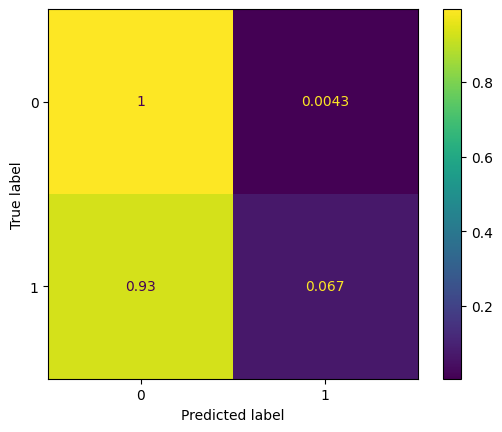

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize= "true") # normalize a true muestra el recall

- El modelo es muy bueno para la clase 0 pero muy malo para la clase 1.
- Parece que el modelo está fuertemente sesgado hacia la clase 0.
- Podría ser un problema de clase desbalanceada, donde la clase 0 tiene muchos más ejemplos que la clase 1.
- Métrica clave a observar: La recall de la clase 1 es muy baja (~6.7%), lo que indica que la mayoría de los casos positivos no son detectados.